# 데이터전처리

### 1. Scaling (정규화):
#### - Min-Max Scaling
#### - Standard Scling (Z-정규화)
### 2. Sampling
#### - Oversampling
#### - Undersampling
### 3. Dimensionality Reduction (차원축소)
### 4. Categorical Variable to Numeric Variable
#### - Label Encoding
#### - One-hot Encoding

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import os
from os.path import join
import warnings
warnings.filterwarnings('ignore')  # 파이썬하면서 쓸 때 없는 경고들 나오는 걸 무시해 달라는 메소드입니다.

#### 먼저 머신러닝의 대표적인 데이터 셋 중 하나인 전복 데이터를 불러오겠습니다.
#### 전복 데이터셋은 수컷, 암컷, 유아기 3개의 범주로 이루어진 범주형 변수와 길이, 직경, 높이, 무게 등 여러 수치형 변수로 이루어져 있습니다.
#### 데이터를 불러온 후 입력으로 사용할 변수들과 레이블로 사용할 성별 변수로 나누겠습니다.

In [2]:
abalone_path=join('.','abalone.txt')
column_path=join('.','abalone_attributes.txt')

# column head를 만들어보겠습니다.
abalone_columns=list()
for l in open(column_path):
    abalone_columns.append(l.strip())  # 뒤에 \n 표시를 제거하기 위해 strip 메소드를 사용합니다.
print(abalone_columns)

['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']


In [3]:
# Pandas를 이용해서 abalone데이터를 읽어오겠습니다.
data=pd.read_csv(abalone_path, header=None, names=abalone_columns)  # 첫번째 열부터 데이터라고 알려주겠습니다. header가 없는 데이터라는 뜻입니다. 그리고 아까 만들어 놓은 column head를 붙여보았습니다.
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
# head(). shape를 사용하여 데이터를 살펴보겠습니다.
# sex == label data이고 나머지 column은 feature data입니다.
data.head()  # 습관적으로 한번씩 해야할 것 01

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
data.shape  # 습관적으로 한번씩 해야할 것 02

(4177, 9)

In [6]:
label=data['Sex'] # oversampling에서 쓸 label입니다.
del data['Sex'] # label data를 삭제해봅시다.
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
data.describe  # 습관적으로 한번씩 해야할 것 03

<bound method NDFrame.describe of       Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

     

In [8]:
data.info()  # 습관적으로 한번씩 해야할 것 04

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [9]:
# Scaling을 해봅시다. Scaling을 해야하는 이유가 있습니다.
# 변수(값)의 크기가 다른 변수에 비해 너무 크거나 작을 경우 결과에 미치는 영향이 제대로 발현되지 않을 때가 있습니다.
# 이를 개선하기 위해 각 변수 범위를 지정해서 1~100 사이의 수치와 같이 전부 맞춥니다. 이것이 Min-Max Scailing입니다.
data2=(data-np.min(data))/(np.max(data)-np.min(data))  # 공식 함수 라이브러리가 있으나 한 번 직접해보겠습니다. 실전에서는 공식 함수를 쓰는 것을 추천합니다.
data2

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,0.357143
4173,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,0.321429
4174,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,0.285714
4175,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,0.321429


In [10]:
# 1) 데이터 전처리 모듈을 불러오고 정의해봅시다. 여기서부터는 사이킷런을 사용합니다.
from sklearn.preprocessing import MinMaxScaler
mMscaler = MinMaxScaler()
mMscaler.fit(data)  # 데이터를 연결합니다. 데이터를 붙여넣기만 합니다.
data3 = mMscaler.transform(data)  # 데이터를 변환합니다. fit한 후 보통 늘 합니다.
data3

array([[0.51351351, 0.5210084 , 0.0840708 , ..., 0.1323239 , 0.14798206,
        0.5       ],
       [0.37162162, 0.35294118, 0.07964602, ..., 0.06319947, 0.06826109,
        0.21428571],
       [0.61486486, 0.61344538, 0.11946903, ..., 0.18564845, 0.2077728 ,
        0.28571429],
       ...,
       [0.70945946, 0.70588235, 0.18141593, ..., 0.37788018, 0.30543099,
        0.28571429],
       [0.74324324, 0.72268908, 0.13274336, ..., 0.34298881, 0.29347285,
        0.32142857],
       [0.85810811, 0.84033613, 0.17256637, ..., 0.49506254, 0.49177877,
        0.39285714]])

In [11]:
mMscaler = MinMaxScaler()
data4 = mMscaler.fit_transform(data)  # fit과 transform을 합쳐놓은 메소드입니다. 두 기능을 따로 해야하는 경우 빼고는 보통 이 메소드를 씁니다.
data4

array([[0.51351351, 0.5210084 , 0.0840708 , ..., 0.1323239 , 0.14798206,
        0.5       ],
       [0.37162162, 0.35294118, 0.07964602, ..., 0.06319947, 0.06826109,
        0.21428571],
       [0.61486486, 0.61344538, 0.11946903, ..., 0.18564845, 0.2077728 ,
        0.28571429],
       ...,
       [0.70945946, 0.70588235, 0.18141593, ..., 0.37788018, 0.30543099,
        0.28571429],
       [0.74324324, 0.72268908, 0.13274336, ..., 0.34298881, 0.29347285,
        0.32142857],
       [0.85810811, 0.84033613, 0.17256637, ..., 0.49506254, 0.49177877,
        0.39285714]])

In [12]:
mMscaled_data=pd.DataFrame(data4, columns=data.columns)
mMscaled_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


In [13]:
# 2. Standard Scaling
# 분포를 보고 싶을 때 씁니다.
# 데이터의 평균이 0, 표준편차가 1이 되도록 합니다. 즉, 가운데가 0 그 위 아래로 +- 1의 범위 안에 들어오도록 Scaling 합니다.
from sklearn.preprocessing import StandardScaler
sdscaler=StandardScaler()
sdscaled_data=sdscaler.fit_transform(data)
sdscaled_data=pd.DataFrame(sdscaled_data, columns=data.columns)
sdscaled_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


In [14]:
# Sampling을 해봅시다. Sampling은 random over sampling와 random under sampling로 2개가 있습니다.
# sampling은 데이터를 무작위로 추출해서 늘리거나 줄이는 작업을 합니다.
# 1. Random Over, Under Sampling를 해보겠습니다. 패키지로 sampling을 해보겠습니다.
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
ros=RandomOverSampler()
rus=RandomUnderSampler()
# over와 under의 샘플을 생성을 해봤습니다.

In [15]:
# Over Sampling 해보겠습니다.
oversampled_data, oversampled_label=ros.fit_resample(data, label)
oversampled_data=pd.DataFrame(oversampled_data,columns=data.columns)

#Under Sampling도 해보겠습니다.
undersampled_data, undersampled_label=rus.fit_resample(data,label)
undersampled_data=pd.DataFrame(undersampled_data,columns=data.columns)

In [16]:
print('원본 데이터의 클래스 비율 \n{0}'.format(pd.get_dummies(label).sum()))
print('\nRandom Over 샘플링 결과\n{0}'.format(pd.get_dummies(oversampled_label).sum()))  # dummies.sum은 데이터를 전부 가지고 와서 그룹별로 합계내는 메소드입니다.
print('\nRandom Under 샘플링 결과\n{0}'.format(pd.get_dummies(undersampled_label).sum())) # over는 많은 갯수를 기준으로 데이터를 만들어 내고 under는 적은 갯수를 기준으로 데이터를 삭제합니다.

원본 데이터의 클래스 비율 
F    1307
I    1342
M    1528
dtype: int64

Random Over 샘플링 결과
F    1528
I    1528
M    1528
dtype: int64

Random Under 샘플링 결과
F    1307
I    1307
M    1307
dtype: int64


In [17]:
# Over Sampling의 경우, 복제를 할 때 선택된 데이터 위치에 똑같은 점을 찍기 때문에 데이터 자체에 과적합 될 수 있습니다.
# 이 경우 데이터 편향을 막기 위해 A와 B 두 점이 떨어져 있는 것을 발 견할 시, 이 사이에 점을 찍는 방법을 쓸 수 있습니다.
# 이 방법을 SMOTE라고 부릅니다. SMOTE를 적용해봅시다.
from imblearn.over_sampling import SMOTE
smote=SMOTE(k_neighbors=5)  # 근처에 5개의 점을 찾아서 그 중간지점에 복제를 하라는 뜻입니다.

from sklearn.datasets import make_classification
data, label=make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=3, n_clusters_per_class=1, weights=[0.05,0.15,0.8], class_sep=0.8, random_state=2019)  # 총 샘플의 갯수, 총 피쳐의 갯수(x,y로 2개)를 주고 여러 옵션을 넣어주어야 오류가 안납니다. weights는 가중치입니다.

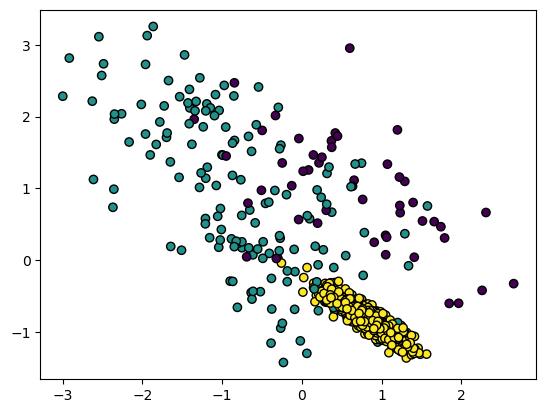

In [18]:
fig=plt.Figure(figsize=(12,6))
plt.scatter(data[:,0], data[:,1], c=label, linewidth=1, edgecolor='black')  # 보라색이 0번 청록색이 1번, 노란색이 2번인 듯 보입니다. 이 상태가 바로 특정 데이터에 과적합이 됐다는 상태입니다.

In [19]:
smoted_data, smoted_label=smote.fit_resample(data,label)

In [20]:
print("원본 데이터의 클래스 비율 \n{0}".format(pd.get_dummies(label).sum()))
print("Smoted 데이터의 클래스 비율 \n{0}".format(pd.get_dummies(smoted_label).sum()))

원본 데이터의 클래스 비율 
0     53
1    154
2    793
dtype: int64
Smoted 데이터의 클래스 비율 
0    793
1    793
2    793
dtype: int64


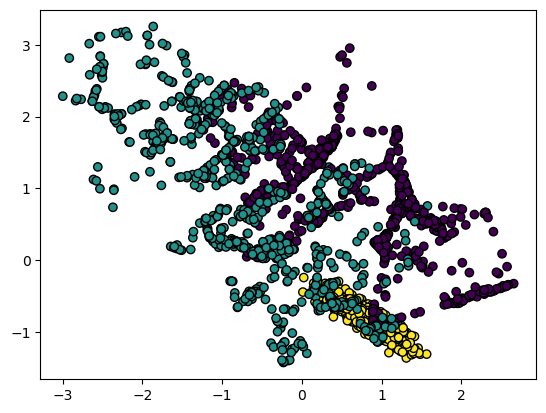

In [21]:
fig = plt.Figure(figsize=(12,6))
plt.scatter(smoted_data[:,0], smoted_data[:,1], c=smoted_label, linewidth=1, edgecolor='black')

In [22]:
# 차원축소(=주성분분석, PCA)에 대해 배워봅시다. 차원축소는 왜 해야 할까요?
# 차원이 많아질 수록 공간이 많아져서 빈 공간이 생겨 데이터가 없는 경우가 생깁니다.
# 그래서 필요없는 변수 제거를 통해 데이터의 밀도를 높이고, 과적합 방지, 사람이 인식할 수 있는 차원은 최대 3차원 뿐이기 때문에 차원을 축소해주는 것입니다.
# 차원축소의 이유는 데이터의 밀도를 높여서 학습의 효율을 높이기 위해서 입니다.
# 차원축소의 목적은 이 중에서 어떤게 가장 주성분인가를 알아내는 방법입니다.
from sklearn.datasets import load_digits
digits=load_digits()

In [23]:
print(digits.DESCR)  # 사이킷런 안에 있는 데이터 셋은 친절하게 어떤 데이터인지 설명 되어 있습니다. DESCR 메소드를 쓰면 됩니다.

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [24]:
data=digits.data
label=digits.target  # 사이킷런에서는 라벨을 타겟이라고 합니다.

In [25]:
print(data[0])
print(label[0]) # target의 이름을 label로 만들어줬기 때문에 label을 출력결과로 설정합니다.

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0


In [26]:
print(data[0].reshape((8,-1)))  # 64개의 데이터를 일렬로 놓고 보면 어지러우니까 8*8의 형태로 reshape하여 깔끔하게 봐봅시다. 숫자가 높을수록 진하게 보여집니다. -1은 8개로 끊고 나머지는 컴퓨터야 니가 알아서 해라는 뜻입니다. -1은 잘 모르겠다. 라는 뜻입니다. 이게 좋은 점이 데이터 갯수가 변경되더라도 유연하게 형태를 변경할 수 있다는 점입니다.

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Label:0


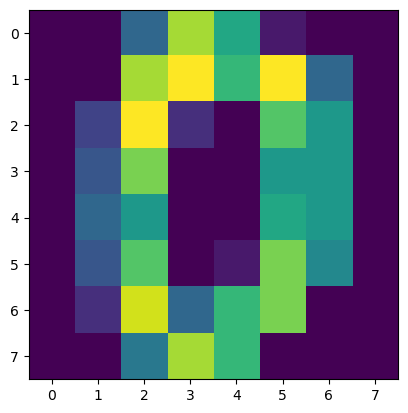

In [27]:
# 이제 위 데이터 형태로 그림을 그려봅시다.
plt.imshow(data[0].reshape((8,8)))
print('Label:{}'.format(label[0]))

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # PCA모듈을 활용하여 2차원으로 축소해봅시다.

In [29]:
# 이제 데이터에서 주성분을 찾아봅시다.
new_data=pca.fit_transform(data)

In [30]:
# 결과를 볼까요.
print('원본 데이터의 차원\n{}'.format(data.shape))
print('PCA 데이터의 차원\n{}'.format(new_data.shape))

원본 데이터의 차원
(1797, 64)
PCA 데이터의 차원
(1797, 2)


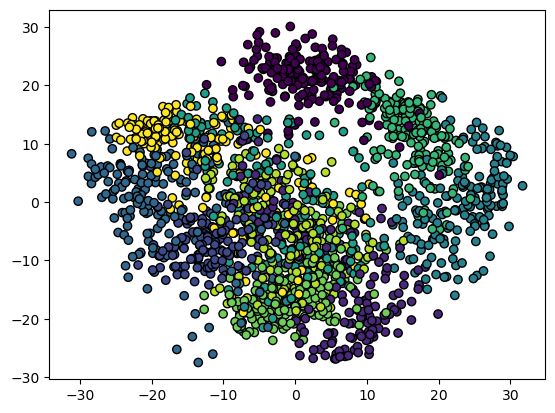

In [31]:
# 64차원의 데이터를 2차원으로 확 줄여도 되는걸까요 ? 결론은 됩니다. 차원이 많으면 오히려 학습이 안됍니다.
# 차원을 줄인다고 속성이 날아가지 않기 때문에 차원을 확 줄여도 됩니다.
plt.scatter(new_data[:,0],new_data[:,1], c=label, linewidth=1, edgecolor='black')
# 맷플로립은 데이터가 3차원이라고 해서 3차원의 그림을 그려주진 않습니다. 3차원 그래프를 그리는 방법은 따로 있어요.

In [32]:
# 이번엔 데이터 자체의 변별력을 높이기 위해서 차원을 늘리는 방법을 알아봅시다. 이를 Label Encoding, One-hot Encoding이라 합니다.
# '소형','중형'...과 같은문자코드를 '0','1'...의 숫자코드로 바꾸는 것을 Label Encoding이라고 합니다.
data=pd.read_csv(abalone_path, header=None, names=abalone_columns)
label=data['Sex']
del data  # label 데이터만 남기고 피처데이터는 전부삭제 해 봅시다. 

In [33]:
from sklearn.preprocessing import LabelEncoder
labelEncode=LabelEncoder()

encoded_label=labelEncode.fit_transform(label)  # 문자라벨을 숫자라벨로 바꿔봅시다. 종류를 나타낼 때는 인코딩하시는 걸 추천합니다. 문자 > 숫자 > 불 순서로 가벼워집니다.
encoded_label

array([2, 2, 0, ..., 2, 0, 2])

In [34]:
# One-hot Encoding을 알아봅시다. 데이터의 갯수만큼 차원을 늘려 0과 1로 표시합니다. 이 경우 데이터의 변별성이 올라갑니다.
# 만약 종류가 만개가 넘어 종류가 많아지면 속도가 떨어집니다.
# 이 방법은 중복값 없이 전부 독립적으로 처리하기위해 선택합니다.
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
label.values.reshape((-1,1))  # 한 줄에 하나씩 넣어서 만들어 달라는 뜻입니다.
one_hot_encoded=ohe.fit_transform(label.values.reshape((-1,1)))  # 원핫인코딩을 했습니다.
one_hot_encoded

<4177x3 sparse matrix of type '<class 'numpy.float64'>'
	with 4177 stored elements in Compressed Sparse Row format>

In [35]:
columns=np.concatenate([np.array(['label']),ohe.categories_[0]])  # 카테고리를 뽑아 봅시다. 맨 앞의 라벨은 라벨이라는 이름을 가진 배열을 만든 것 입니다.
columns

array(['label', 'F', 'I', 'M'], dtype=object)

In [36]:
ohe.categories_[0]  # 두 배열을 합쳤습니다.

array(['F', 'I', 'M'], dtype=object)

In [37]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit(label.values.reshape((-1, 1)))
one_hot_encoded = ohe.transform(label.values.reshape((-1,1)))

columns = np.concatenate([np.array(['label']) , ohe.categories_[0]])
print(columns)
result = pd.DataFrame(data = np.concatenate(
                      [label.values.reshape((-1,1)), one_hot_encoded.reshape((-1, 3))], 
                      axis=1),columns=columns)
result.head(10)

['label' 'F' 'I' 'M']


,label,F,I,M
0,M,0.0,0.0,1.0
1,M,0.0,0.0,1.0
2,F,1.0,0.0,0.0
3,M,0.0,0.0,1.0
4,I,0.0,1.0,0.0
5,I,0.0,1.0,0.0
6,F,1.0,0.0,0.0
7,F,1.0,0.0,0.0
8,M,0.0,0.0,1.0
9,F,1.0,0.0,0.0
